# Transform Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Bigdata/data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df=df.drop(['CustomerID'],axis=1)
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Not Using Library


In [ ]:
X = df.iloc[:,[2,3]].values.tolist()

In [ ]:
import random
import numpy as np
from array import *
import matplotlib.pyplot as plt
from random import randint

In [ ]:
def neighboorPoints (eps, minPts, points, pointIndex):
    neighboors = []
    firstPoint = np.array(points[pointIndex])
    for j in range(len(points)):
        secondPoint = np.array(points[j])
        if ((np.linalg.norm(firstPoint - secondPoint)) <= eps): 
            neighboors.append(secondPoint)
    return neighboors

def find (points,point):
    for i in range(len(points)):
        if(points[i] == point):
            return i
    return -1

def dbscan(points,minPts,eps):
    visitedPoints = [0] * len(points)
    pointTypes = [0] * len(points)
    neighboors = []
    clusters = []
    noises = []
    
    point = points[0]
    index = 0
    while True:
        visitedPoints[index] = 1
        neighboors = neighboorPoints(eps, minPts, points, index)
        if(len(neighboors) >= minPts):
            pointTypes[index] = "core"
            newCluster = []
            newCluster.append(points[index])
            n = []
            for p in neighboors:
                n.append(p.tolist())
            i = 0
            lenn = len(n)
            while(i < lenn):
                if((n[i] != points[index]) and
                   (visitedPoints[find(points, n[i])] != 1)):
                    visitedPoints[find(points, n[i])] = 1
                    if (len(neighboorPoints(eps, minPts, points, find(points, n[i]))) >= minPts):
                        newNeigh = neighboorPoints(eps, minPts, points, find(points, n[i]))
                        for j in newNeigh:
                            n.append(j.tolist())
                    added = False
                    for m in range(len(clusters)):
                        if(find(clusters[m], n[i]) != -1):
                            added = True
                            break
                    if(added == False):
                        newCluster.append(n[i])
                i = i + 1
                lenn = len(n)  
            if(len(newCluster) >= minPts):
                 clusters.append(newCluster)
        else:
            pointTypes[index] = "noise"
            noises.append(points[index])
        for k in range(len(visitedPoints)):
            if(k > index):
                if(visitedPoints[k] == 0):
                    index = k
                    break
        point = points[index]
        if (find(visitedPoints, 0) == -1):
            for y in range(len(pointTypes)):
                if(pointTypes[y] == 0):
                    pointTypes[y] = "border"
            break
    return clusters, pointTypes,noises
    

In [ ]:
def plotData(clusters,noises):
    colors = []
    for i in range(40):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    clusters.append(noises)
    for i in range(len(clusters)):
        color = colors[i]
        h = color.lstrip('#')
        if(i == (len(clusters)-1)):
            print("NOISE COLOR: black")
            color = "black"
        x = []
        y = []
        for j in range(len(clusters[i])):
            x.append(clusters[i][j][0])
            y.append(clusters[i][j][1])
        plt.scatter(x,y,c=color,alpha=1,marker='.')

NOISE COLOR: black


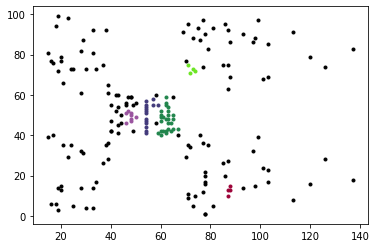

In [ ]:
result = dbscan(X,4,3)
plotData(result[0],result[2])

# Using Libary Sklearn

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [ ]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
x=df.iloc[:,[2,3]].values

In [ ]:
model=db.fit(x)

In [ ]:
label=model.labels_

In [ ]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

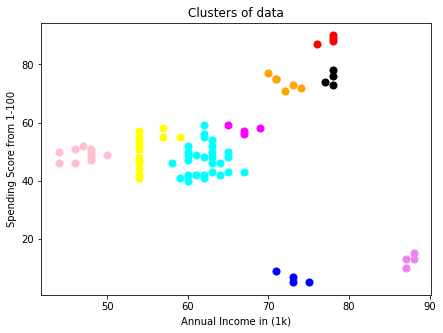

In [ ]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()